# Analyze Product Sentiment

In [1]:
import turicreate

# Read product review data

In [2]:
products = turicreate.SFrame('amazon_baby.sframe')

# Explore data

In [3]:
products

name,review,rating
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0


In [4]:
products.groupby('name',operations={'count':turicreate.aggregate.COUNT()}).sort('count',ascending=False)

name,count
Vulli Sophie the GiraffeTeether ...,785
"Simple Wishes Hands-FreeBreastpump Bra, Pink, ...",562
Infant Optics DXR-5 2.4GHz Digital Video Baby ...,561
Baby Einstein Take AlongTunes ...,547
Cloud b TwilightConstellation Night ...,520
"Fisher-Price BoosterSeat, Blue/Green/Gray ...",489
Fisher-Price RainforestJumperoo ...,450
"Graco Nautilus 3-in-1 CarSeat, Matrix ...",419
Leachco Snoogle TotalBody Pillow ...,388
"Regalo Easy Step WalkThru Gate, White ...",374


# Examine the reivews for the most-reviewed product

In [5]:
giraffe_reviews = products[products['name']=='Vulli Sophie the Giraffe Teether']

In [6]:
giraffe_reviews

name,review,rating
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0
Vulli Sophie the GiraffeTeether ...,"My baby seems to likethis toy, but I could ...",3.0


In [7]:
len(giraffe_reviews)

785

In [8]:
#giraffe_reviews['rating'].show()

# Building a sentiment classifier

## Build word count vectors

In [9]:
products['word_count'] = turicreate.text_analytics.count_words(products['review'])

In [10]:
products

name,review,rating,word_count
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0,"{'handles': 1.0,'stripping': 1.0, ..."
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'moist': 1.0, 'osocozy': ..."
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0,'comfortable': 1.0, ..."
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'little': 1.0, ..."
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ..."
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ..."
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ..."


# Define what is positive and negative sentiment

In [11]:
#products['rating'].show()

In [12]:
#ignore all 3*  reviews
products = products[products['rating']!= 3]

In [13]:
#positive sentiment = 4-star or 5-star reviews
products['sentiment'] = products['rating'] >= 4

In [14]:
products

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'moist': 1.0, 'osocozy': ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0,'comfortable': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'little': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'tracker': 1.0,'recommend': 1.0, ...",1


In [15]:
#products['sentiment'].show()

# Train our sentiment classifier

In [16]:
train_data,test_data = products.random_split(.8,seed=0)

In [17]:
sentiment_model = turicreate.logistic_classifier.create(train_data,target='sentiment', features=['word_count'], validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 57356

Number of coefficients      : 57357

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 1.722012     | 0.841421          | 0.840019            |

| 1         | 9        | 3.250000  | 2.546625     | 0.931359          | 0.911362            |

| 2         | 11       | 2.669978  | 2.917618     | 0.938650          | 0.916466            |

| 3         | 12       | 2.669978  | 3.181135     | 0.927417          | 0.901814            |

| 4         | 14       | 1.326072  | 3.591207     | 0.945200          | 0.918088            |

| 9         | 20       | 1.326072  | 5.016840     | 0.977654          | 0.917698            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

# Apply the sentiment classifier to better understand the Giraffe reviews

In [18]:
products['predicted_sentiment'] = sentiment_model.predict(products, output_type = 'probability')

In [19]:
products

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'moist': 1.0, 'osocozy': ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0,'comfortable': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'little': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'tracker': 1.0,'recommend': 1.0, ...",1


In [20]:
giraffe_reviews = products[products['name']== 'Vulli Sophie the Giraffe Teether']

In [21]:
giraffe_reviews

name,review,rating,word_count,sentiment
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0,"{'purchase': 1.0,'teething': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0,"{'a': 1.0, 'is': 1.0,'when': 1.0, 'him': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0,"{'made': 1.0, 'of': 1.0,'packaging': 1.0, 'no': ...",0
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0,"{'another': 1.0, 'out':1.0, 'run': 1.0, 'lost': ...",1
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0,"{'disappointed': 1.0,'will': 1.0, 'take': ...",1
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0,"{'late': 1.0, 'perfect':1.0, 'pack': 1.0, 'on ...",1
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0,"{'delight': 1.0, 'in':1.0, 'other': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0,"{'inside': 1.0, 'water':1.0, 'don': 1.0, 'up': ...",1
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0,"{'its': 1.0, 'fine': 1.0,'is': 1.0, 'which': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,This product is without adoubt the best on the ...,5.0,"{'belongs': 1.0, 'dog':1.0, 'if': 1.0, 'bewa ...",1


# Sort the Giraffe reviews according to predicted sentiment

In [22]:
giraffe_reviews = giraffe_reviews.sort('predicted_sentiment', ascending=False)

In [23]:
giraffe_reviews

name,review,rating,word_count,sentiment
Vulli Sophie the GiraffeTeether ...,As a mother of 16monthold twins; I bought ...,5.0,"{'use': 1.0, 'get': 1.0,'will': 1.0, 'where': ...",1
Vulli Sophie the GiraffeTeether ...,I'll be honest...I boughtthis toy because all the ...,4.0,"{'explore': 1.0,'adventures': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,"Sophie, oh Sophie, yourtime has come. My ...",5.0,"{'09': 1.0, '11': 1.0,'recommended': 1.0, ' ...",1
Vulli Sophie the GiraffeTeether ...,We got this littlegiraffe as a gift from a ...,5.0,"{'parents': 1.0,'recommend': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,"As every mom knows, youalways want to give your ...",5.0,"{'future': 1.0, 'use':1.0, 'am': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,My Mom-in-Law boughtSophie for my son whe ...,5.0,"{'penny': 1.0, 'worth':1.0, 'definitely': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,"My 4 month old son isteething, and I've tried ...",4.0,"{'teether': 1.0, 'want':1.0, 'price': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,Let me just start off byaddressing the choking ...,5.0,"{'must': 1.0, 'nuts':1.0, 'we': 1.0, 'thei ...",1
Vulli Sophie the GiraffeTeether ...,I'm not sure why Sophieis such a hit with the ...,4.0,"{'well': 1.0, 'natural':1.0, 'makers': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,"I admit, I didn't getSophie the Giraffe at ...",4.0,"{'dye': 1.0, 'of': 1.0,'cause': 1.0, 'fade': ...",1


In [24]:
giraffe_reviews.tail()

name,review,rating,word_count,sentiment
Vulli Sophie the GiraffeTeether ...,My 7 1/2 month oldgrandbaby was sittng up ...,1.0,"{'sopie': 1.0, 'with':1.0, 'be': 1.0, 'shou ...",0
Vulli Sophie the GiraffeTeether ...,I was so looking forwardto getting this for my ...,1.0,"{'vulli': 1.0, 'by': 1.0,'two': 1.0, 'garanima ...",0
Vulli Sophie the GiraffeTeether ...,Received the product andsmells like cheap rub ...,1.0,"{'was': 1.0, 'as': 1.0,'still': 1.0, 'but': ...",0
Vulli Sophie the GiraffeTeether ...,I got one of these as ashowe gift that my baby ...,1.0,"{'ask': 1.0, 'off': 1.0,'rubbed': 1.0, 'toy': ...",0
Vulli Sophie the GiraffeTeether ...,When we first got it Ithought did my ...,2.0,"{'mom': 1.0, 'teethers':1.0, 'btw': 1.0, 'oth ...",0
Vulli Sophie the GiraffeTeether ...,When I received this thepaint was peeling off in ...,1.0,"{'worth': 1.0, 'for':1.0, 'about': 1.0, ...",0
Vulli Sophie the GiraffeTeether ...,"""Sophie the Giraffe"" hastested positive for ...",1.0,"{'they': 1.0,'naturally': 1.0, ...",0
Vulli Sophie the GiraffeTeether ...,"My son (now 2.5) LOVEDhis Sophie, and I bought ...",1.0,"{'exaggerated': 1.0,'are': 1.0, 'down': 1.0, ...",0
Vulli Sophie the GiraffeTeether ...,I wanted to love thisproduct and was excited ...,1.0,"{'ready': 1.0, 'work':1.0, 'too': 1.0, 'just': ...",0
Vulli Sophie the GiraffeTeether ...,This children's toy isnostalgic and very cute. ...,1.0,"{'amazon': 1.0, 'from':1.0, 'one': 1.0, 'by': ...",0


## Show the most positive reviews

In [25]:
giraffe_reviews[0]['review']

"As a mother of 16month old twins; I bought Sophie [1 for each, of course] when they were 4 months old after careful reading of all reviews. I heard great things about Sophie and wanted to give her a try. At 4 months babies can't do much more than grasp and semi gnaw on Sophie. For many months I had to squeeze Sophie myself [which I personally enjoyed] and set it on their laps. They LOVED Sophie. The squeak is LOUD and sounds exactly like a dog's squeaky chew toy, just for those who are wondering.As they grew and their motor skills developed to each milestone, Sophie gained more and more individual babytime. The twins were able to squeeze her themselves and chew on her around the clock. They love to throw her, stretch her, squeeze her, chew on her, drool on her... you name it, they have done it. One of the two Sophie's took an extended vacation out in the back yard [unbeknownst to me] and once found, a little water had her looking like a champ again... ready to face another day of play

In [26]:
giraffe_reviews[1]['review']

'I\'ll be honest...I bought this toy because all the hip parents seem to have one too and I wanted to be a part of the "hip parent" crowd. The price-tag was somewhat of a deterent but I prevailed and purchased this teether for my daughter.At first, Lily didn\'t know what to make of of Sophie and showed little interest in the polka-dotted creature. I continued to introduce Lily to Sophie and kept the toy in the carrier so that it was on-hand during transitions. Eventually, Lily discovered what a wonderful experience it was to gnaw on the hooves and ears and these two have never been far apart since.Lily really enjoys gumming all the different parts of Sophie like no other teether we have. The size of the toy is great as it is somewhat substantial and so easy for a little one to grasp and hold onto. Lily really enjoys hearing Sophie squeak and will smile whenever Sophie makes a noise or pops her head up from Mommy\'s lap to say hello.People have stopped and commented on Sophie and to the

# Most negative reivews

In [27]:
giraffe_reviews[-1]['review']

"This children's toy is nostalgic and very cute. However, there is a distinct rubber smell and a very odd taste, yes I tried it, that my baby did not enjoy. Also, if it is soiled it is extremely difficult to clean as the rubber is a kind of porus material and does not clean well. The final thing is the squeaking device inside which stopped working after the first couple of days. I returned this item feeling I had overpaid for a toy that was defective and did not meet my expectations. Please do not be swayed by the cute packaging and hype surounding it as I was. One more thing, I was given a full refund from Amazon without any problem."

In [28]:
giraffe_reviews[-2]['review']

'I wanted to love this product and was excited to buy it when I became pregnant but am now hesitant to let my baby use it after reading about the recall in Europe. Apparently, as I understand it, their toxin standards of measurement are lower than ours so they have not been recalled here (apparently we are OK with low levels of nitrates in the toys our children put in their mouths, but Europeans are not...hmmm)...Be that as it may, toxins registering even CLOSE to a dangerous level made me nervous about using. After digging around online I did discover that the company claims to have changed the product after a certain date and lists manufacturing codes so you can check yours (those listed were made after a certain date and are said to be safer). Sadly mine was not made after the &#34;improved&#34; date but I could not return it because there was no formal recall in our country. I considered returning it and hunting for one with an approved manufacturing date but man that was just too 

# Assignments

In the Jupyter notebook above, we used the word counts for all words in the reviews to train the sentiment classifier model. Now, we are going to follow a similar path, but only use this subset of the words:

In [29]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

## Use .apply() to build a new feature with the counts for each of the selected_words:
In the notebook above, we created a column ‘word_count’ with the word counts for each review.  Our first task is to create a new column in the products SFrame with the counts for each selected_word above, and, in the process, we will see how the method .apply() can be used to create new columns in our data (our features) and how to use a Python function, which is an extremely useful concept to grasp!    

In [30]:
'''
def awesome_count(word_count):
    if 'awesome' in word_count:
        return word_count['awesome']
    
def great_count(word_count):
    if 'great' in word_count:
        return word_count['great']

def fantastic_count(word_count):
    if 'fantastic' in word_count:
        return word_count['fantastic']

def amazing_count(word_count):
    if 'amazing' in word_count:
        return word_count['amazing']

def love_count(word_count):
    if 'love' in word_count:
        return word_count['love']

def horrible_count(word_count):
    if 'horrible' in word_count:
        return word_count['horrible']

def bad_count(word_count):
    if 'bad' in word_count:
        return word_count['bad']

def terrible_count(word_count):
    if 'terrible' in word_count:
        return word_count['terrible']

def awful_count(word_count):
    if 'awful' in word_count:
        return word_count['awful']

def wow_count(word_count):
    if 'wow' in word_count:
        return word_count['wow']

def hate_count(word_count):
    if 'hate' in word_count:
        return word_count['hate']


products['awesome'] = products['word_count'].apply(awesome_count)
products['great'] = products['word_count'].apply(awesome_count)
products['fantastic'] = products['word_count'].apply(awesome_count)
products['amazing'] = products['word_count'].apply(awesome_count)
products['love'] = products['word_count'].apply(awesome_count)
products['horrible'] = products['word_count'].apply(awesome_count)
products['bad'] = products['word_count'].apply(awesome_count)
products['terrible'] = products['word_count'].apply(awesome_count)
products['awful'] = products['word_count'].apply(awesome_count)
products['wow'] = products['word_count'].apply(awesome_count)
products['hate'] = products['word_count'].apply(awesome_count)
'''
# tutorial
# https://stackoverflow.com/questions/33506826/call-function-use-apply-in-python
def word_count_func(word_count, word):
    if word in word_count:
        return word_count[word]
    else:
        return 0
    
for word in selected_words:
    products[word] = products['word_count'].apply(lambda word_count: word_count_func(word_count, word))

In [31]:
products.head()

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'moist': 1.0, 'osocozy': ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0,'comfortable': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'little': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'tracker': 1.0,'recommend': 1.0, ...",1


Using the .sum() method on each of the new columns you created, answer the following questions: Out of the selected_words, which one is most used in the dataset? Which one is least used? Save these results to answer the quiz at the end.

In [32]:
for word in selected_words:
    print("{}: {}".format(word, products[word].sum()))

awesome: 3892.0
great: 55791.0
fantastic: 1664.0
amazing: 2628.0
love: 41994.0
horrible: 1110
bad: 4183
terrible: 1146.0
awful: 687
wow: 425
hate: 1107


## Create a new sentiment analysis model using only the selected_words as features:
In the Jupyter Notebook above, we used word counts for all words as features for our sentiment classifier.  Now, you are just going to use the selected_words:

In [34]:
# Use the same train/test split as in the Jupyter Notebook from lecture:
train_data,test_data = products.random_split(.8, seed=0)

Train a logistic regression classifier (use turicreate.logistic_classifier.create) using just the selected_words.  Hint:  you can use this parameter in the .create() call to specify the features used to be exactly the new columns you just created:

In [35]:
selected_words_model = turicreate.logistic_classifier.create(train_data,
                                                     target='sentiment',
                                                     features=selected_words,
                                                     validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 11

Number of unpacked features : 11

Number of coefficients      : 12

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.136732     | 0.847401          | 0.845874            |

| 2         | 3        | 0.204736     | 0.847514          | 0.846085            |

| 3         | 4        | 0.265348     | 0.847626          | 0.846115            |

| 4         | 5        | 0.325479     | 0.847708          | 0.846385            |

| 5         | 6        | 0.384844     | 0.847708          | 0.846385            |

| 6         | 7        | 0.444634     | 0.847708          | 0.846385            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

You will now examine the weights the learned classifier assigned to each of the 11 words in selected_words and gain intuition as to what the ML algorithm did for your data using these features. In Turi Create, a learned model, such as the selected_words_model, has a field 'coefficients', which lets you look at the learned coefficients.  You can access it by using:

In [37]:
coefficients = selected_words_model.coefficients

Using this approach, sort the learned coefficients according to the ‘value’ column using .sort(). 

In [38]:
coefficients = coefficients.sort('value', ascending=False)
coefficients

name,index,class,value,stderr
love,None,1,1.3592688669225153,0.028068300152099435
(intercept),None,1,1.3365913848877558,0.008929969787656753
awesome,None,1,1.133534666034145,0.08399643983187526
amazing,None,1,1.1000933113660283,0.09954776260465983
fantastic,None,1,0.8858047568814295,0.11167591293399656
great,None,1,0.8630655001196618,0.018955052444377323
wow,None,1,-0.009538236067678897,0.1604641122471166
bad,None,1,-0.9914778800650565,0.03848428664699063
hate,None,1,-1.3484407222463124,0.07715698604297333
awful,None,1,-2.0529082040313513,0.10099735435259259


## Comparing the accuracy of different sentiment analysis model:  Using the method

In [39]:
selected_words_model.evaluate(test_data)

{'accuracy': 0.8463848186404036,
 'auc': 0.6935096220934976,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        0        |  371  |
 |      0       |        1        |  4957 |
 |      1       |        1        | 27817 |
 |      1       |        0        |  159  |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9157860082304526,
 'log_loss': 0.3962265467087378,
 'precision': 0.8487520595594068,
 'recall': 0.9943165570488991,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+-----+-------+------+
 | threshold |        fpr         | tpr |   p   |  n   |
 +-----------+--------------------+-----+-------+------+
 |    0.0    |        1.0         | 1.0 | 27976 | 5328 

In [40]:
sentiment_model.evaluate(test_data)

{'accuracy': 0.9176975738650012,
 'auc': 0.9258242975424673,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |  1397 |
 |      0       |        0        |  3931 |
 |      1       |        1        | 26632 |
 |      1       |        0        |  1344 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.951057941255245,
 'log_loss': 0.3304787187241234,
 'precision': 0.9501587641371436,
 'recall': 0.9519588218472976,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.0  

In [52]:
ev = selected_words_model.evaluate(test_data, metric='roc_curve')

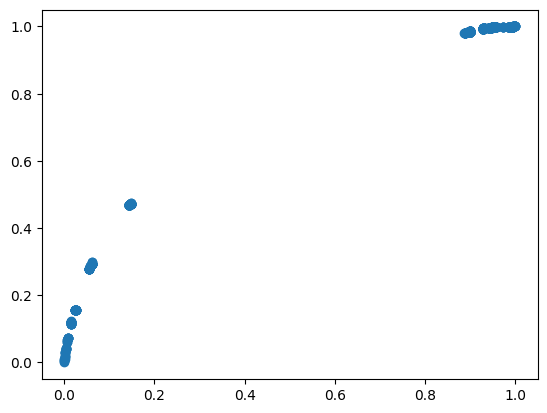

In [53]:
import matplotlib.pyplot as plt
plt.scatter(ev['roc_curve']['fpr'], ev['roc_curve']['tpr'])

## Interpreting the difference in performance between the models:

To understand why the model with all word counts performs better than the one with only the selected_words, we will now examine the reviews for a particular product.

In [54]:
diaper_champ_reviews = products[products['name'] == 'Baby Trend Diaper Champ']
diaper_champ_reviews.head()

name,review,rating,word_count,sentiment
Baby Trend Diaper Champ,Ok - newsflash. Diapersare just smelly. We've ...,4.0,"{'convenient': 1.0,'can': 1.0, 'you': 1.0, ...",1
Baby Trend Diaper Champ,"My husband and I selectedthe Diaper ""Champ"" ma ...",1.0,"{'try': 1.0, 'going':1.0, 're': 1.0, 'leav ...",0
Baby Trend Diaper Champ,Excellent diaper disposalunit. I used it in ...,5.0,"{'nose': 1.0, 'for': 2.0,'investment': 1.0, ...",1
Baby Trend Diaper Champ,We love our diaper champ.It is very easy to use ...,5.0,"{'out': 1.0, 'pull': 1.0,'open': 1.0, 'pail': ...",1
Baby Trend Diaper Champ,Two girlfriends and twofamily members put me ...,5.0,"{'winter': 1.0,'especially': 1.0, ...",1
Baby Trend Diaper Champ,I waited to review thisuntil I saw how it ...,4.0,"{'mom': 1.0, 'huge': 1.0,'special': 1.0, 'good': ...",1
Baby Trend Diaper Champ,I have had a diaper geniefor almost 4 years since ...,1.0,"{'clean': 1.0, 'it': 8.0,'thing': 1.0, 'years': ...",0
Baby Trend Diaper Champ,I originally put thisitem on my baby registry ...,5.0,"{'price': 1.0, 'worth':1.0, 'other': 2.0, ...",1
Baby Trend Diaper Champ,I am so glad I got theDiaper Champ instead of ...,5.0,"{'best': 1.0, 'that':1.0, 'handle': 1.0, ...",1
Baby Trend Diaper Champ,We had 2 diaper Genie'sboth given to us as a ...,4.0,"{'need': 1.0, 'garbage':1.0, 'regular': 1.0, ...",1


In [55]:
diaper_champ_reviews['predicted_sentiment'] = sentiment_model.predict(diaper_champ_reviews, output_type='probability')

In [56]:
diaper_champ_reviews = diaper_champ_reviews.sort('predicted_sentiment', ascending=False)

In [57]:
diaper_champ_reviews.head()

name,review,rating,word_count,sentiment
Baby Trend Diaper Champ,I read a review belowthat can explain exactly ...,4.0,"{'key': 1.0, 'have': 1.0,'pieces': 1.0, 'betwe ...",1
Baby Trend Diaper Champ,I have never written areview for Amazon but I ...,5.0,"{'priceless': 1.0,'parent': 1.0, 'makes': ...",1
Baby Trend Diaper Champ,I originally put thisitem on my baby registry ...,5.0,"{'price': 1.0, 'worth':1.0, 'other': 2.0, ...",1
Baby Trend Diaper Champ,Baby Luke can turn aclean diaper to a dirty ...,5.0,"{'around': 1.0, 'bulk':1.0, 'any': 1.0, 't': ...",1
Baby Trend Diaper Champ,Diaper Champ or DiaperGenie? That was my ...,5.0,"{'be': 1.0, 'won': 1.0,'open': 1.0, 'if': 1.0, ...",1
Baby Trend Diaper Champ,I am one of those super-critical shoppers who ...,5.0,"{'helps': 1.0, 'slower':1.0, 'changings': 1.0, ...",1
Baby Trend Diaper Champ,I LOOOVE this diaperpail! Its the easies ...,5.0,"{'buy': 1.0, 'looking':1.0, 'product': 1.0, ...",1
Baby Trend Diaper Champ,"As a first time mother, Iwanted to get the best ...",5.0,"{'ll': 1.0, 'baby': 1.0,'recommended': 1.0, ' ...",1
Baby Trend Diaper Champ,I see that there arecomplaints of stinkiness ...,5.0,"{'very': 1.0, 'seems':1.0, 'all': 1.0, ...",1
Baby Trend Diaper Champ,I have a 10 year olddaughter and an 8 month ...,5.0,"{'sorry': 1.0, 'be': 1.0,'sell': 1.0, 'not': 2.0, ...",1


In [70]:
diaper_champ_reviews['predicted_sentiment'].max()

0.9999999999895941

In [72]:
sentiment_model.predict(diaper_champ_reviews[0:1], output_type='probability')

dtype: float
Rows: 1
[0.9999999999895941]

In [83]:
diaper_champ_reviews['predicted_sentiment_2']  = selected_words_model.predict(diaper_champ_reviews, output_type='probability')
#diaper_champ_reviews.head()

In [84]:
diaper_champ_reviews['predicted_sentiment_2'].max()

0.9981253623335122

In [85]:
selected_words_model.predict(diaper_champ_reviews[0:1], output_type='probability')

dtype: float
Rows: 1
[0.7919288370624453]

In [86]:
diaper_champ_reviews.head()

name,review,rating,word_count,sentiment
Baby Trend Diaper Champ,I read a review belowthat can explain exactly ...,4.0,"{'key': 1.0, 'have': 1.0,'pieces': 1.0, 'betwe ...",1
Baby Trend Diaper Champ,I have never written areview for Amazon but I ...,5.0,"{'priceless': 1.0,'parent': 1.0, 'makes': ...",1
Baby Trend Diaper Champ,I originally put thisitem on my baby registry ...,5.0,"{'price': 1.0, 'worth':1.0, 'other': 2.0, ...",1
Baby Trend Diaper Champ,Baby Luke can turn aclean diaper to a dirty ...,5.0,"{'around': 1.0, 'bulk':1.0, 'any': 1.0, 't': ...",1
Baby Trend Diaper Champ,Diaper Champ or DiaperGenie? That was my ...,5.0,"{'be': 1.0, 'won': 1.0,'open': 1.0, 'if': 1.0, ...",1
Baby Trend Diaper Champ,I am one of those super-critical shoppers who ...,5.0,"{'helps': 1.0, 'slower':1.0, 'changings': 1.0, ...",1
Baby Trend Diaper Champ,I LOOOVE this diaperpail! Its the easies ...,5.0,"{'buy': 1.0, 'looking':1.0, 'product': 1.0, ...",1
Baby Trend Diaper Champ,"As a first time mother, Iwanted to get the best ...",5.0,"{'ll': 1.0, 'baby': 1.0,'recommended': 1.0, ' ...",1
Baby Trend Diaper Champ,I see that there arecomplaints of stinkiness ...,5.0,"{'very': 1.0, 'seems':1.0, 'all': 1.0, ...",1
Baby Trend Diaper Champ,I have a 10 year olddaughter and an 8 month ...,5.0,"{'sorry': 1.0, 'be': 1.0,'sell': 1.0, 'not': 2.0, ...",1


In [87]:
diaper_champ_reviews[0]['review']

"I read a review below that can explain exactly what we experienced. We've had it for 16 months and it has worked wonderful for us. No smells, change it out once a week, easy to clean. Then a diaper snagged this foam material in the head part, so I pulled the rest of the foam out. Big mistake!!! Now it can no loner retain the stinkiness and we're looking for a replacement. Be careful of overloading and never take out that foam piece that is cushioned between pieces. I have figured out that it is key to keeping the stink out."

In [88]:
diaper_champ_reviews[0]['word_count']

{'key': 1.0,
 'have': 1.0,
 'pieces': 1.0,
 'between': 1.0,
 'cushioned': 1.0,
 'piece': 1.0,
 'take': 1.0,
 'overloading': 1.0,
 'be': 1.0,
 'looking': 1.0,
 're': 1.0,
 'stinkiness': 1.0,
 'retain': 1.0,
 'now': 1.0,
 'stink': 1.0,
 'once': 1.0,
 'of': 2.0,
 'below': 1.0,
 'rest': 1.0,
 'so': 1.0,
 'head': 1.0,
 'never': 1.0,
 'foam': 3.0,
 'careful': 1.0,
 'the': 5.0,
 'diaper': 1.0,
 'snagged': 1.0,
 'then': 1.0,
 'figured': 1.0,
 'week': 1.0,
 'can': 2.0,
 'change': 1.0,
 'smells': 1.0,
 'no': 2.0,
 'wonderful': 1.0,
 'mistake': 1.0,
 'pulled': 1.0,
 'big': 1.0,
 'worked': 1.0,
 '16': 1.0,
 'review': 1.0,
 'has': 1.0,
 'and': 3.0,
 'months': 1.0,
 'in': 1.0,
 've': 1.0,
 'that': 4.0,
 'part': 1.0,
 'had': 1.0,
 'what': 1.0,
 'a': 4.0,
 'we': 3.0,
 'material': 1.0,
 'is': 2.0,
 'explain': 1.0,
 'exactly': 1.0,
 'this': 1.0,
 'it': 5.0,
 'for': 3.0,
 'to': 2.0,
 'loner': 1.0,
 'clean': 1.0,
 'keeping': 1.0,
 'replacement': 1.0,
 'out': 5.0,
 'experienced': 1.0,
 'easy': 1.0,
 'read'